In [2]:
library(hise)
library(ggh4x)
library(ggplot2)
library(stats)
library(parallel)
library(dplyr)
library(readxl)
library(tidyverse)
library(rstatix)
library(ggpubr)
library(corrplot)

In [72]:
meta_data<-read.csv("/home/workspace/IHA_Figure_Revision/Figure4/00_Flu_Year_Specific_Meta_Data/meta_data.csv")


In [73]:
df_MSD<-read.csv("/home/workspace/IHA_Figure_Revision/Figure4/02_Total_IgG_MSD_Assay/MSD_All.csv")
df_MSD<-df_MSD[c("Sample.Kit.Barcode","Assay","Mean","Calc..Conc..Mean","subject.biologicalSex",
             'cohort.cohortGuid', 'subjectGuid','CMV','Flu_Year','Flu_Day','Visit_Type','Year_N','Visit_Flu_Year')]

In [74]:
file_list<-list.files("/home/workspace/IHA_Figure_Revision/Dataset/MSD/")
file_list

[1] "MSD Recent_20231026_092142.csv"             
[2] "Plate 2BLHSAU095_mouse_anti-human_IgG3.xlsx"
[3] "Plate_2BLHSA1081_mouse_anti-human_IgG1.xlsx"
[4] "Plate_2BLHSA4100_mouse_anti-human_IgG4.xlsx"
[5] "Plate_2BLHSAW094_mouse_anti-human_IgG2.xlsx"

In [75]:
df_list<-mclapply(file_list[2:5],function(x){


df<-readxl::read_excel(paste0("/home/workspace/IHA_Figure_Revision/Dataset/MSD/",x), skip = 1) %>% as.data.frame()
df$Isotype<-sub(".*_([^_]+)\\.xlsx$", "\\1", x, perl = TRUE)
df_filtered<- df %>% filter(grepl("PL",Sample)) %>% filter(`Calc. Conc. Mean`!="NaN")
return(df_filtered)
})
df<-do.call(rbind,df_list)

In [76]:
df$sample.sampleKitGuid<-paste0("KT",substr(df$Sample,3,7))

In [77]:
df<-left_join(df,meta_data)

Joining with `by = join_by(sample.sampleKitGuid)`


In [78]:
colnames(df_combined)

[1] "Sample"                  "Assay"                  
 [3] "sample.sampleKitGuid"    "Isotype_Signal"         
 [5] "Signal"                  "log 10 Calc. Conc. Mean"
 [7] "Isotype"                 "Mean"                   
 [9] "Calc..Conc..Mean"        "subject.biologicalSex"  
[11] "cohort.cohortGuid"       "subjectGuid"            
[13] "CMV"                     "Flu_Year"               
[15] "Flu_Day"                 "Visit_Type"             
[17] "Year_N"                  "Visit_Flu_Year"         
[19] "Total_Singal"

In [79]:
df$`Calc.Conc.Mean.Isotype`<-as.numeric(df$`Calc. Conc. Mean`)
df$`log 10 Calc. Conc. Mean`<-log10(as.numeric(df$`Calc. Conc. Mean`))

In [81]:
df_Isotype <- df %>%
    select(Sample, 
           Assay, 
           sample.sampleKitGuid, 
           `Signal`,`log 10 Calc. Conc. Mean`, `Calc.Conc.Mean.Isotype`,
           Isotype)

In [82]:
colnames(df_Isotype)[4]<-"Isotype_Signal"
df_combined <- left_join(df_Isotype, df_MSD, by = c(Assay = "Assay", 
                                                    sample.sampleKitGuid = "Sample.Kit.Barcode"))

In [83]:
df_combined<-df_combined %>% mutate(Total_Singal=Mean)

In [84]:
write.csv(df_combined,"Isotype_MSD_Processed.csv")

# Calculate Ratio

In [16]:
df_combined$Isotype_to_Total_Singal_Ratio<-df_combined$Isotype_Signal/df_combined$Total_Singal

In [17]:
df_combined<-df_combined %>% filter(Isotype_Signal>10,Total_Singal>10)%>% 
filter(Isotype_Signal<1000000,Total_Singal<1000000)

In [20]:
df_combined_subset<-df_combined %>% filter(Isotype %in% c("IgG3","IgG2"), Assay =="Flu B/Phuket HA") 

In [21]:
write.csv(df_combined_subset,"Isotype_Singal_IgG2_IgG3_Phuket.csv")

In [3]:
df<-read.csv("Isotype_Singal_IgG2_IgG3_Phuket.csv")

In [6]:
df_subet<-df %>% filter(Flu_Day=="Day_0",Flu_Year=="2020-2021")

In [8]:
df_subet<-df_subet %>% 
    group_by(subjectGuid) %>%
    mutate(entry_count = n()) %>%
    filter(entry_count == 2) %>% ungroup()

In [11]:
colnames(df_subet)

[1] "X.2"                                      
 [2] "Sample.x"                                 
 [3] "Assay"                                    
 [4] "sample.sampleKitGuid"                     
 [5] "Isotype_Signal"                           
 [6] "log.10.Calc..Conc..Mean"                  
 [7] "Isotype"                                  
 [8] "X.1"                                      
 [9] "Sample.y"                                 
[10] "Type"                                     
[11] "Subject"                                  
[12] "Cohort"                                   
[13] "Visit"                                    
[14] "Batch.ID"                                 
[15] "well"                                     
[16] "Dilution"                                 
[17] "Concentration"                            
[18] "Signal"                                   
[19] "Adjusted.Signal"                          
[20] "Mean"                                     
[21] "Adj..Sig..Mean"                           
[22] "CV"                                       
[23] "X..Recovery"                              
[24] "X..Recovery.Mean"                         
[25] "Calc..Concentration"                      
[26] "Calc..Conc..Mean"                         
[27] "Calc..Conc..CV"                           
[28] "Notes"                                    
[29] "Batch"                                    
[30] "X"                                        
[31] "Unnamed..0"                               
[32] "lastUpdated"                              
[33] "sample.id"                                
[34] "sample.bridgingControl"                   
[35] "sample.visitName"                         
[36] "sample.visitDetails"                      
[37] "sample.drawDate"                          
[38] "sample.daysSinceFirstVisit"               
[39] "file.id"                                  
[40] "file.name"                                
[41] "file.batchID"                             
[42] "file.panel"                               
[43] "file.pool"                                
[44] "file.fileType"                            
[45] "file.majorVersion"                        
[46] "subject.id"                               
[47] "subject.biologicalSex"                    
[48] "subject.birthYear"                        
[49] "subject.ethnicity"                        
[50] "subject.partnerCode"                      
[51] "subject.race"                             
[52] "subject.subjectGuid"                      
[53] "cohort.cohortGuid"                        
[54] "sample.diseaseStatesRecordedAtVisit"      
[55] "pbmc_sample_id"                           
[56] "subject.covidVaxDose1.daysSinceFirstVisit"
[57] "subject.covidVaxDose2.daysSinceFirstVisit"
[58] "Covid_exclusion"                          
[59] "subjectGuid"                              
[60] "CMV"                                      
[61] "Flu_Year"                                 
[62] "Flu_Day"                                  
[63] "Visit_Type"                               
[64] "Year_N"                                   
[65] "Visit_Flu_Year"                           
[66] "Total_Singal"                             
[67] "Isotype_to_Total_Singal_Ratio"            
[68] "entry_count"

In [35]:
df_subet %>% filter(subjectGuid=="BR1019") %>% select(Isotype_Signal)

Isotype_Signal
<int>
4586
590


In [37]:
df_summay<-df_subet %>%
  arrange(subjectGuid, Cohort, Isotype) %>%
  group_by(subjectGuid, Cohort) %>%
  summarise(IgG2_IgG3_Ratio = first(log.10.Calc..Conc..Mean	) / last(log.10.Calc..Conc..Mean), .groups = "drop")

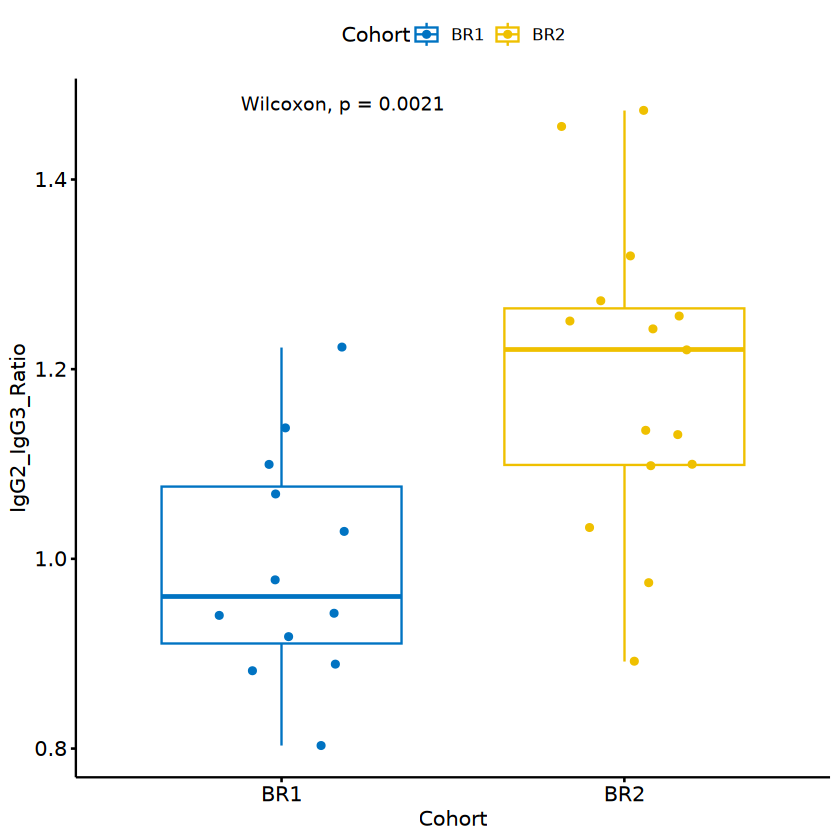

In [39]:
 ggboxplot(df_summay, x = "Cohort", y = "IgG2_IgG3_Ratio",
          color = "Cohort", palette = "jco",
          add = "jitter") + stat_compare_means()